In [1]:
# Import all libraries

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy import stats
from io import StringIO
import time


In [2]:
# Import dataset

df = pd.read_csv("vehicle_maintenance_data.csv")

# Confirm dataset loaded
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


## **Data Preprocessing**

In [4]:
# Dataset details and summary statistics

print(df.info())

# Categorical Summary Statistics
print(f'Categorical Summary Statistics \ndf.describe(include= object).T\n')

# Numerical Summary Statistics
print(f'Numerical Summary Statistics \ndf.describe(include= np.number).T\n')

# Isolate numerical variables
numeric_df = df.select_dtypes(include=np.number)

# Isolate categorical variables
categorical_df = df.select_dtypes(include=object)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

# **XGBoost Analysis**

                 Feature    Importance
18        Battery_Status  3.884441e-01
17       Brake_Condition  3.240936e-01
3        Reported_Issues  1.330237e-01
2    Maintenance_History  6.858889e-02
14      Accident_History  5.432719e-02
13       Service_History  3.149646e-02
4            Vehicle_Age  5.112423e-06
9      Last_Service_Date  4.823446e-06
10  Warranty_Expiry_Date  4.182388e-06
7            Engine_Size  3.736730e-06
0          Vehicle_Model  2.589688e-06
6      Transmission_Type  1.879310e-06
15       Fuel_Efficiency  1.638691e-06
12     Insurance_Premium  1.263360e-06
1                Mileage  8.917201e-07
8       Odometer_Reading  0.000000e+00
11            Owner_Type  0.000000e+00
16        Tire_Condition  0.000000e+00
5              Fuel_Type  0.000000e+00
Unique values in y_test: [1 0]


C:\Users\laksh\AppData\Local\Temp\ipykernel_15904\4166238580.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[1, 0])


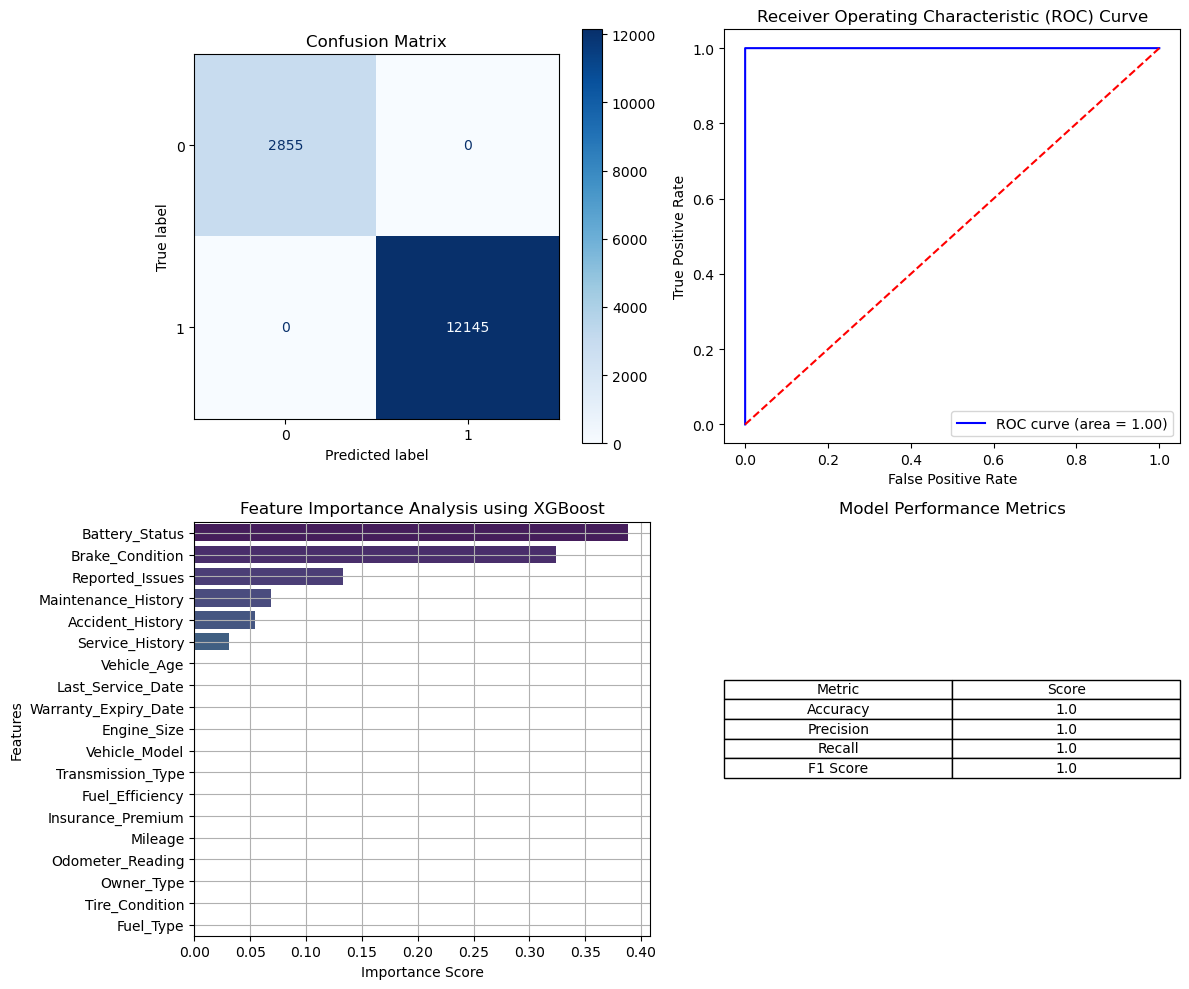

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder

# Load your DataFrame
df = pd.read_csv('vehicle_maintenance_data.csv')  # Uncomment and load your data

# Assuming df has a target column 'Need_Maintenance' and several feature columns
# Keep 'Need_Maintenance' as numeric (1 = Yes, 0 = No)
# This way we can avoid string mapping issues
df['Need_Maintenance'] = df['Need_Maintenance'].map({1: 1, 0: 0})

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop(columns=['Need_Maintenance'])
y = df['Need_Maintenance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Check unique values in y_test
print("Unique values in y_test:", y_test.unique())  # Check unique values

# Ensure we directly use numeric values
y_test_mapped = y_test  # No mapping required, as y_test is already in numeric format

# ROC Curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_prob)
roc_auc = roc_auc_score(y_test_mapped, y_pred_prob)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 subplot layout

# Confusion Matrix
labels = np.unique(y_test)  # Use unique values from y_test for the labels
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(ax=axs[0, 0], cmap='Blues', values_format='d')
axs[0, 0].set_title('Confusion Matrix')

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0, 1].legend(loc='lower right')

# Feature Importance
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Feature Importance Analysis using XGBoost')
axs[1, 0].set_xlabel('Importance Score')
axs[1, 0].set_ylabel('Features')
axs[1, 0].grid()

# Displaying Metrics in a Table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

axs[1, 1].axis('tight')
axs[1, 1].axis('off')
axs[1, 1].table(cellText=metrics_df.values, colLabels=metrics_df.columns, cellLoc='center', loc='center')
axs[1, 1].set_title('Model Performance Metrics')

plt.tight_layout()
plt.show()
